### AdaBoost ( Adaptive Boosting)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# use simple dataset for visualization purpuose
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

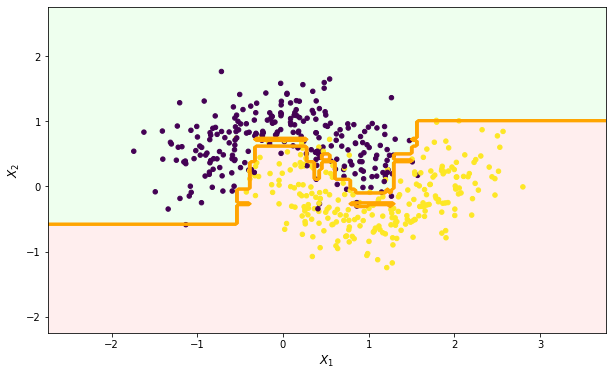

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(10,6))
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))
    
    X_new = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_new).reshape(xx.shape)
    
    cmap_light = mcolors.ListedColormap(["#AAFFAA", "#FFAAAA" ])
    cmap_dark = mcolors.ListedColormap(['orange', 'orange'])
    
    _ = ax.contourf(xx, yy, Z, cmap=cmap_light, alpha = 0.2)
    _ = ax.contour(xx, yy, Z, cmap=cmap_dark)
    _ = ax.scatter(X[:, 0], X[:, 1], c=y, s=20)
    _ = ax.set_xlabel(r'$X_1$', fontsize=12)
    _ = ax.set_ylabel(r'$X_2$', fontsize=12)
    
# define model
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                            n_estimators=200,
                            learning_rate=0.5,
                            random_state=123)
# fit model
ada_clf.fit(X, y)

# plot decision boundary
plot_decision_boundary(ada_clf, X, y)

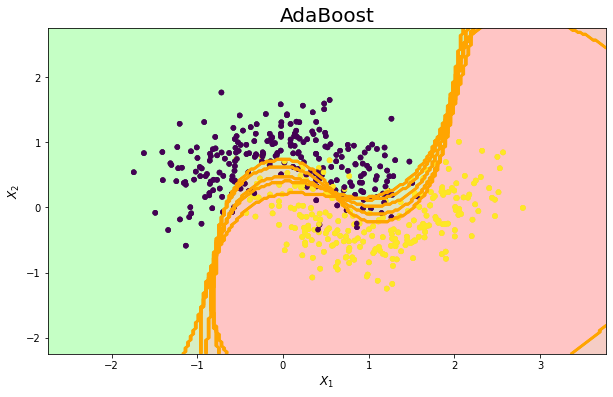

In [42]:
## Implementation of AdaBoost using 5 classifiers

from sklearn.svm import SVC

fig, ax = plt.subplots(figsize=(10,6))
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))
    
    X_new = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_new).reshape(xx.shape)
    
    cmap_light = mcolors.ListedColormap(["#AAFFAA", "#FFAAAA" ])
    cmap_dark = mcolors.ListedColormap(['orange', 'orange'])
    
    _ = ax.contourf(xx, yy, Z, cmap=cmap_light, alpha = 0.2)
    _ = ax.contour(xx, yy, Z, cmap=cmap_dark)
    _ = ax.scatter(X[:, 0], X[:, 1], c=y, s=20)
    _ = ax.set_title('AdaBoost', fontsize=20)
    _ = ax.set_xlabel(r'$X_1$', fontsize=12)
    _ = ax.set_ylabel(r'$X_2$', fontsize=12)

# length of training set
m = len(X_train)
# initialize the weight
w = np.ones(m)/m
# learning rate
learning_rate = 0.4

for i in range(5):
    tree_clf = SVC(kernel="rbf",  C=0.2, gamma=0.6, random_state=42)
    tree_clf.fit(X_train, y_train, sample_weight = w*m)
    y_pred = tree_clf.predict(X_train)
    # Weighted error rate of the jth predictor
    r = w[y_pred != y_train].sum() / w.sum()
    # Predictor weight
    alpha = learning_rate * np.log((1-r)/r)
    # Weight update
    w[y_pred != y_train] *= np.exp(alpha)
    # Normalization
    w /= w.sum()
    plot_decision_boundary(tree_clf, X, y)
    

### Gradient Boosting

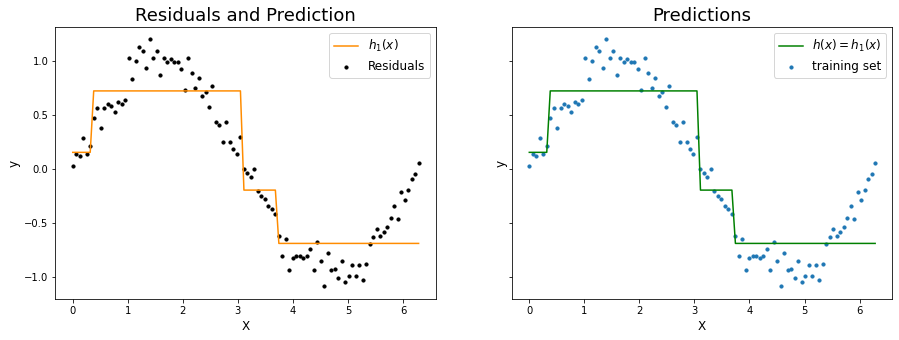

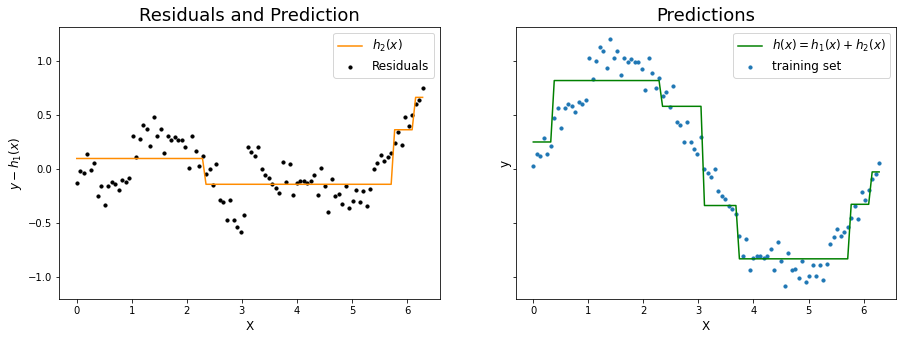

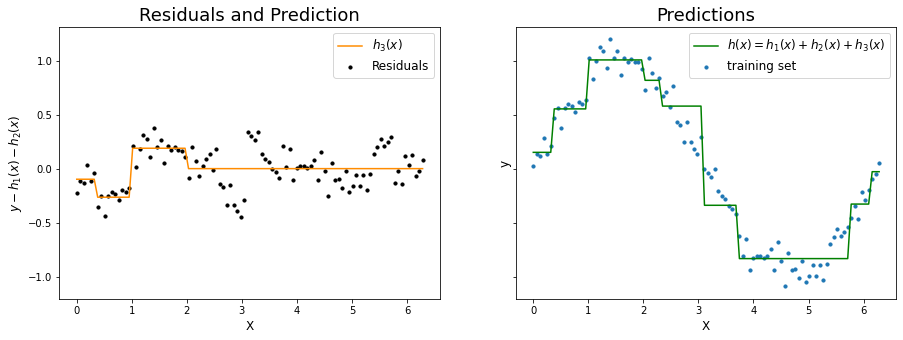

In [80]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt



def plot_gradient_boosting(regressors,reg, X, y1, y2, y_label='', label1='', label2=''):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharey=True)
    _ = ax1.scatter(X, y1, s=10, marker='o', color='black', label='Residuals')
    _ = ax2.scatter(X, y2, s=10, label='training set')
        
    y_pred = reg.predict(X)
    _ = ax1.plot(X, y_pred, color='darkorange', label=label1)
    _ = ax1.set_title('Residuals and Prediction', fontsize=18)
    _ = ax1.set_xlabel('X', fontsize=12)
    _ = ax1.set_ylabel(y_label, fontsize=12)
    ax1.legend(fontsize=12)
    
    
    y_pred = sum(tree.predict(X) for tree in regressors)
    _ = ax2.plot(X, y_pred, color='green', label=label2)
    _ = ax2.set_title('Predictions', fontsize=18)
    _ = ax2.set_xlabel('X', fontsize=12)
    _ = ax2.set_ylabel('y', fontsize=12)
    ax2.legend(fontsize=12)
    
    
# Generate data
X = np.linspace(0, 2*np.pi, 100)
X = X[:, np.newaxis]
gaussian_noise = np.random.randn(len(X),1)/ 10
y = np.sin(X) + gaussian_noise

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X).reshape(X.shape)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X).reshape(X.shape)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)


plot_gradient_boosting([tree_reg1],tree_reg1, X, y, y, 
                       'y', r'$h_1(x)$', r'$h(x)=h_1(x)$' )  

plot_gradient_boosting([tree_reg1, tree_reg2], tree_reg2, X, y2, y, 
                       r'$y - h_1(x)$', r'$h_2(x)$', r'$h(x)=h_1(x) + h_2(x)$' )

plot_gradient_boosting([tree_reg1, tree_reg2, tree_reg3], tree_reg3, X, y3, y, 
                       r'$y - h_1(x) - h_2(x)$', r'$h_3(x)$', r'$h(x)=h_1(x) + h_2(x) + h_3(x)$' )